<font size="6">
    
Predicting Life Expectancy in 2016 for Canada using a Single Predictor Linear Regression Model
    
<font size="3">
Group 006-028
Christopher Mok, Jack Parkinson, Hongwei Wang, May Zang

<font size="6">
Introduction:

<font size="4"> 

Life expectancy, or the average lifespan for a person, varies greatly by country, with various demographic, socioeconomic and health factors that may have an impact on a country’s life expectancy. Our research project will make use of ​​this WHO data repository on Life expectancy of various countries from the years 2000-2015. The factors to be used in our analysis will be infant deaths, alcohol consumption, BMI (Body Mass Index), national healthcare expenditure (as a percentage of GPD per capita), and years of education. 
Thus, this research project aims to use a linear regression model to predict the average Canadian life expectancy in 2016 by determining the best predictor variable from the selected variables. Afterwards, the accuracy of the model will be measured by comparing its results with actual life expectancy test data. 






<font size="6">
Preliminary Data analysis:


    
    
<font size="4">
    
The dataset can be read from the website, and has been cleaned and wrangled into a tidy format with:

In [104]:
#### Loading these libraries:
library(tidyverse)
library(dplyr)
library(tidymodels)
library(GGally)

#### Demonstrate that the dataset can be read from the web into R 
data <- read.csv("https://raw.githubusercontent.com/chrismok3/DSCI-100-006---Group-28-project/main/Life_Expectancy_Data.csv")



<font size="4">
We then filter data for all countries except India because the listed “infant death” rates didn’t make sense (because they were over 1000 infant deaths / 1000 infants). Then we selected just for the relevant variables: Life  Expectancy, infant, deaths, alcohol, bmi, schooling, and percentage expenditure, and omitted  the rows containing NA values:


In [105]:
all_rows <- nrow(data)
data <- filter(data, Country != "India")

data <- select(data, Life.expectancy, infant.deaths, Alcohol, BMI, Schooling, percentage.expenditure)

count_missing <- sum(!complete.cases(data[-1]))
data_new <- na.omit(data)



<font size="4">
Then we need to divide the data into 75% training and 25% testing set:

In [94]:
set.seed(1)
data_split <- initial_split(data_new, prop = 0.75, strata = NULL)
data_train <- training(data_split)
data_test <- testing(data_split)

<font size="4">
And we summarized the training data set in the following table:

In [98]:
# all_rows
# (count_missing)
# nrow(data_train)
# nrow(data_test)
# summary(data_train)

| Total Number of Observations | Rows Including Missing Data | Rows of Training Data| Rows of Testing Data |
| :---                         |    :----:                   |     :----:           |  ---: |
| 2938                         | 363                         |        1916          | 638                  |




| Variable Name | Mean | Min| Max |
| :---                         |    :----:                   |     :----:           |  ---: |
| Life Expectancy                         | 69.34                         |        36.30          | 89.00                  |
| Infant Deaths                         | 22.04                      |        0.00         | 576.00                 |
| Alcohol                        | 4.54                         |        0.01          | 17.87                  |
| BMI                         | 38.05                         |        1.00          | 76.70                  |
| Percentage Expediture                         | 811.33                         |        0.00          | 19479.91                  |
| Schooling                         | 12.03                         |        0.00          | 20.70                  |

Finally we can use ggpairs to graph the relation between Life Expectancy and the predictor varibles represented in the first column on the left. Also, we can see the distributions of the different variables. We can use this figure to help determine which predictor variable we choose to estimate Life expectancy:

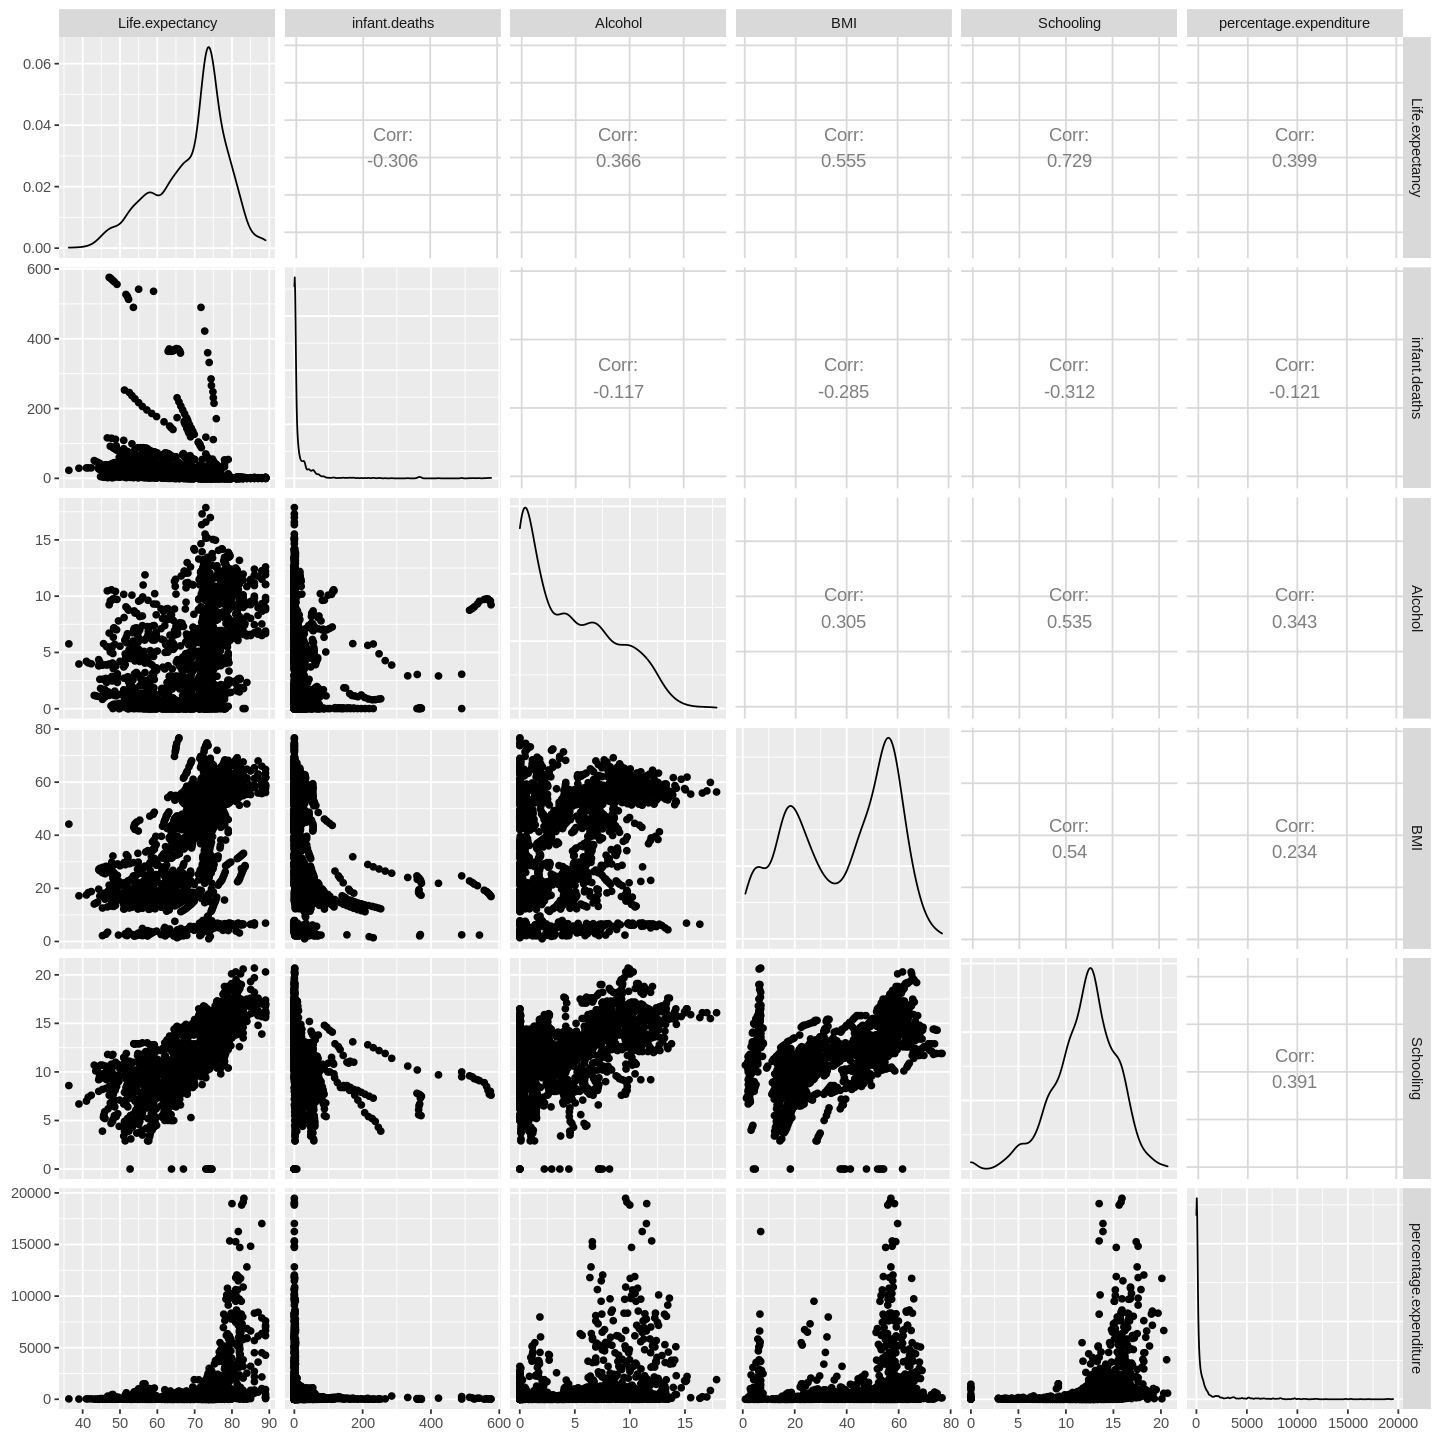

In [96]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggpairs(data_train)

<font size="6">
Methods:
   
<font size="4">
    
Regarding variable selection, we removed variables with many NA values. From the remaining variables, we eliminated all disease-related variables due to the potential third variable of climate (i.e. diseases are more prevalent in warm regions). We decided on 5 predictor variables that seem most likely to affect life expectancy.
After selecting  and cleaning the data, we split the data into the training set and testing set. By making a plot of all the 6 predictor variables versus Life expectancy, we get to determine which predictor variable has the strongest linear fit with life expectancy. And the training data set will be used to make a linear regression model with this predictor and life expectancy. After building the model, we will use the real Canadian statistic in 2016 for the predictor to predict the resultant average life expectancy in Canada. Then we will apply the model to the test set, and compare it with actual data, to test the accuracy of the prediction. We will make a scatter plot of the final 1-predictor model with a linear regression line to visualize the results.


<font size="6">
Expected outcomes and significance 

    
   

<font size="4">
    
    
Upon visual comparison of the 5 different predictor variables vs. life expectancy graphs, we expect to find a specific predictor variable that has a strongest linear relation to life expectancy. This will allow us to create a linear regression model to accurately forecast a country’s life expectancy based on their national data for the chosen predictor variable. 
	The findings of this research project would provide Canadian policymakers with statistically-supported evidence for the association between the chosen predictor variable and life expectancy, and would help focus their policies on improving national standards of the chosen variable, for example increasing healthcare or education subsidies.
	For future research, the interaction effects between predictor variables and their impact on life expectancy could be studied. No causal effects can be drawn from the current project, so a covariate analysis of multiple predictor variables and life expectancy would lead to greater insight on the effects of each variable.
